In [12]:
import os
import talib as ta
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [13]:
BASE_PATH = "../data/stock_data/"
APPL_PATH = os.path.join(BASE_PATH, "AAPL.csv")
AMZN_PATH = os.path.join(BASE_PATH, "AMZN.csv")
GOOG_PATH = os.path.join(BASE_PATH, "GOOG.csv")
META_PATH = os.path.join(BASE_PATH, "META.csv")
MSFT_PATH = os.path.join(BASE_PATH, "MSFT.csv")
NVDA_PATH = os.path.join(BASE_PATH, "NVDA.csv")

## loading data

In [14]:
# read the historical datas into separate variables
appl_df = pd.read_csv(APPL_PATH)
amzm_df = pd.read_csv(AMZN_PATH)
goog_df = pd.read_csv(GOOG_PATH)
meta_df = pd.read_csv(META_PATH)
msft_df = pd.read_csv(MSFT_PATH)
nvda_df = pd.read_csv(NVDA_PATH)

#check the columns
print(appl_df.columns)
print(amzm_df.columns)
print(goog_df.columns)
print(meta_df.columns)
print(msft_df.columns)
print(nvda_df.columns)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


## convert the date column from object to datetime format

In [15]:
appl_df["Date"] = pd.to_datetime(appl_df["Date"])
amzm_df["Date"] = pd.to_datetime(amzm_df["Date"])
goog_df["Date"] = pd.to_datetime(goog_df["Date"])
meta_df["Date"] = pd.to_datetime(meta_df["Date"])
msft_df["Date"] = pd.to_datetime(msft_df["Date"])
nvda_df["Date"] = pd.to_datetime(nvda_df["Date"])

## Stock Data Analysis

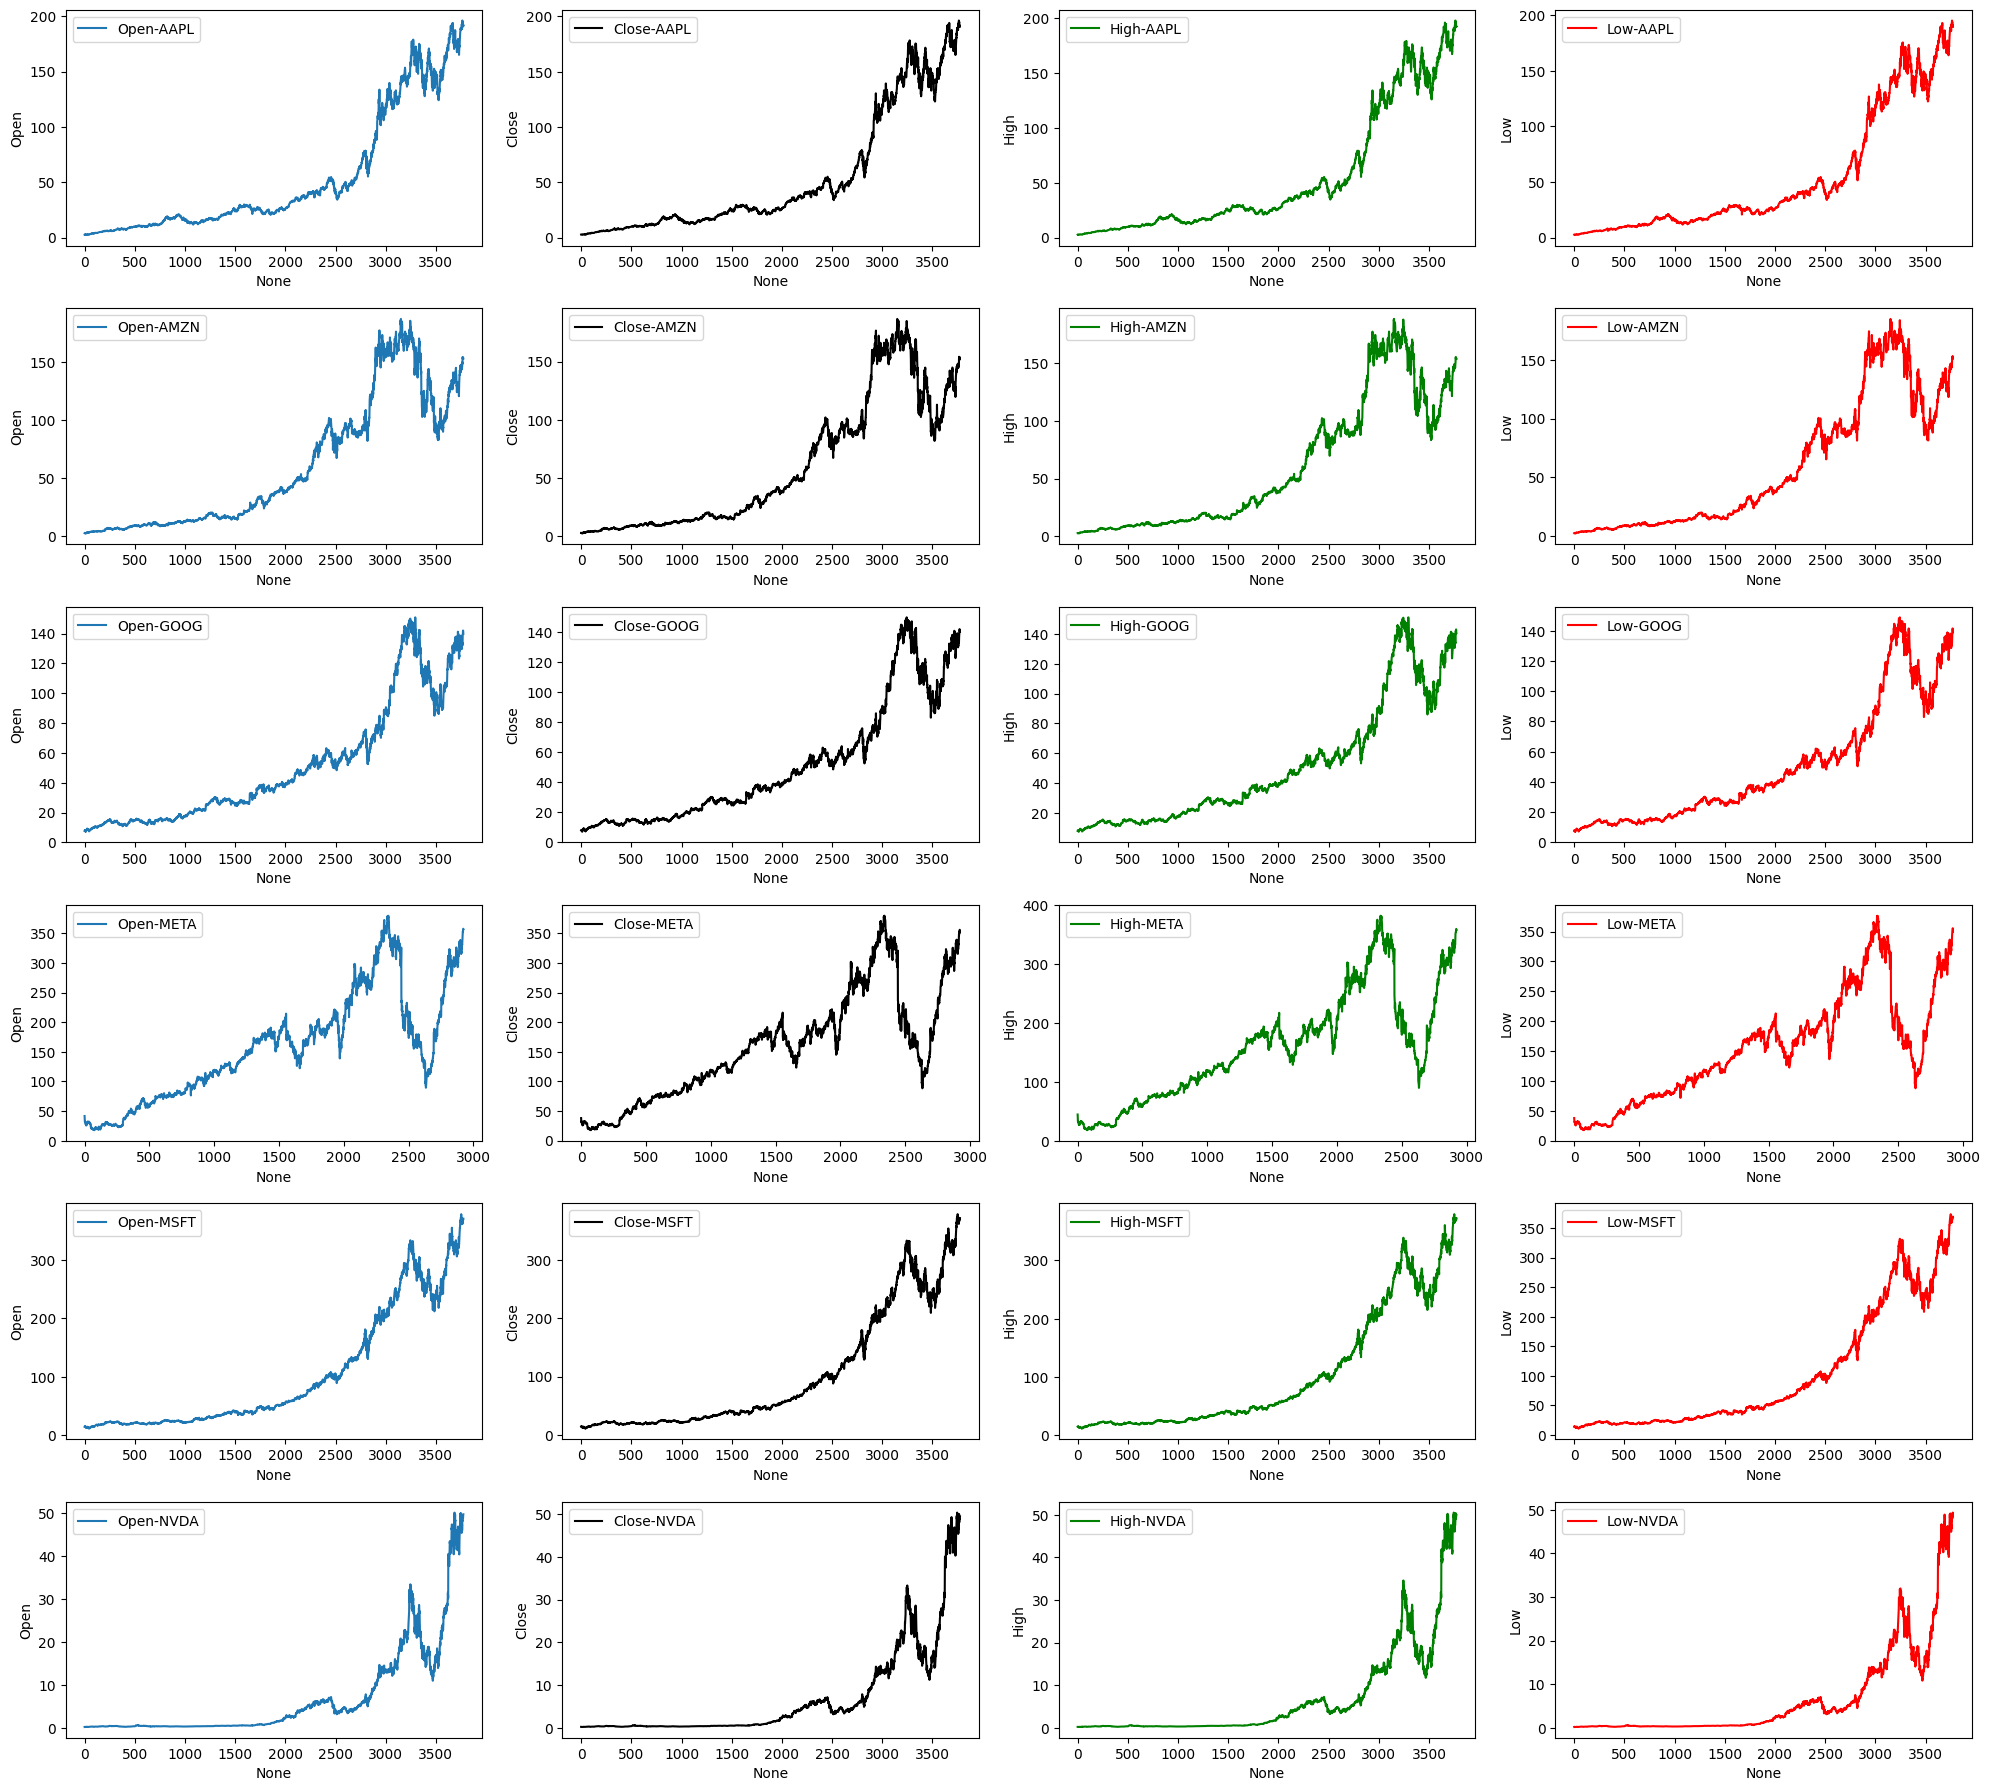

In [16]:
tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]
dataframes = [appl_df, amzm_df, goog_df, meta_df, msft_df, nvda_df]

# for all tickers plot the open, close, High and low prices
fig, ax = plt.subplots(ncols=4, nrows=len(tickers), figsize=(20, 3 * len(tickers)), squeeze=True)

for idx in range(len(tickers)):
    ticker = tickers[idx]
    df = dataframes[idx]
    sns.lineplot(x=df.index, y=df["Open"], ax=ax[idx][0] , label=f"Open-{ticker}")
    sns.lineplot(x=df.index, y=df["Close"], ax=ax[idx][1] , label=f"Close-{ticker}" , color="black")
    sns.lineplot(x=df.index, y=df["High"], ax=ax[idx][2] , label=f"High-{ticker}", color="green")
    sns.lineplot(x=df.index, y=df["Low"], ax=ax[idx][3] , label=f"Low-{ticker}", color="red")
plt.tight_layout(pad=1)
plt.show()


## Calculate the Moving Averages 

In [20]:
# calculating the moving averages
aapl_sma = ta.MA(appl_df['Close'], timeperiod=40)
amzm_sma = ta.MA(amzm_df['Close'], timeperiod=40)
goog_sma = ta.MA(goog_df['Close'], timeperiod=40)
meta_sma = ta.MA(meta_df['Close'], timeperiod=40)
msft_sma = ta.MA(msft_df['Close'], timeperiod=40)
nvda_sma = ta.MA(nvda_df['Close'], timeperiod=40)

# add them to a list
moving_averages = [aapl_sma, amzm_sma, goog_sma, meta_sma, msft_sma, nvda_sma]

## Visualizing the SMA along side the real value

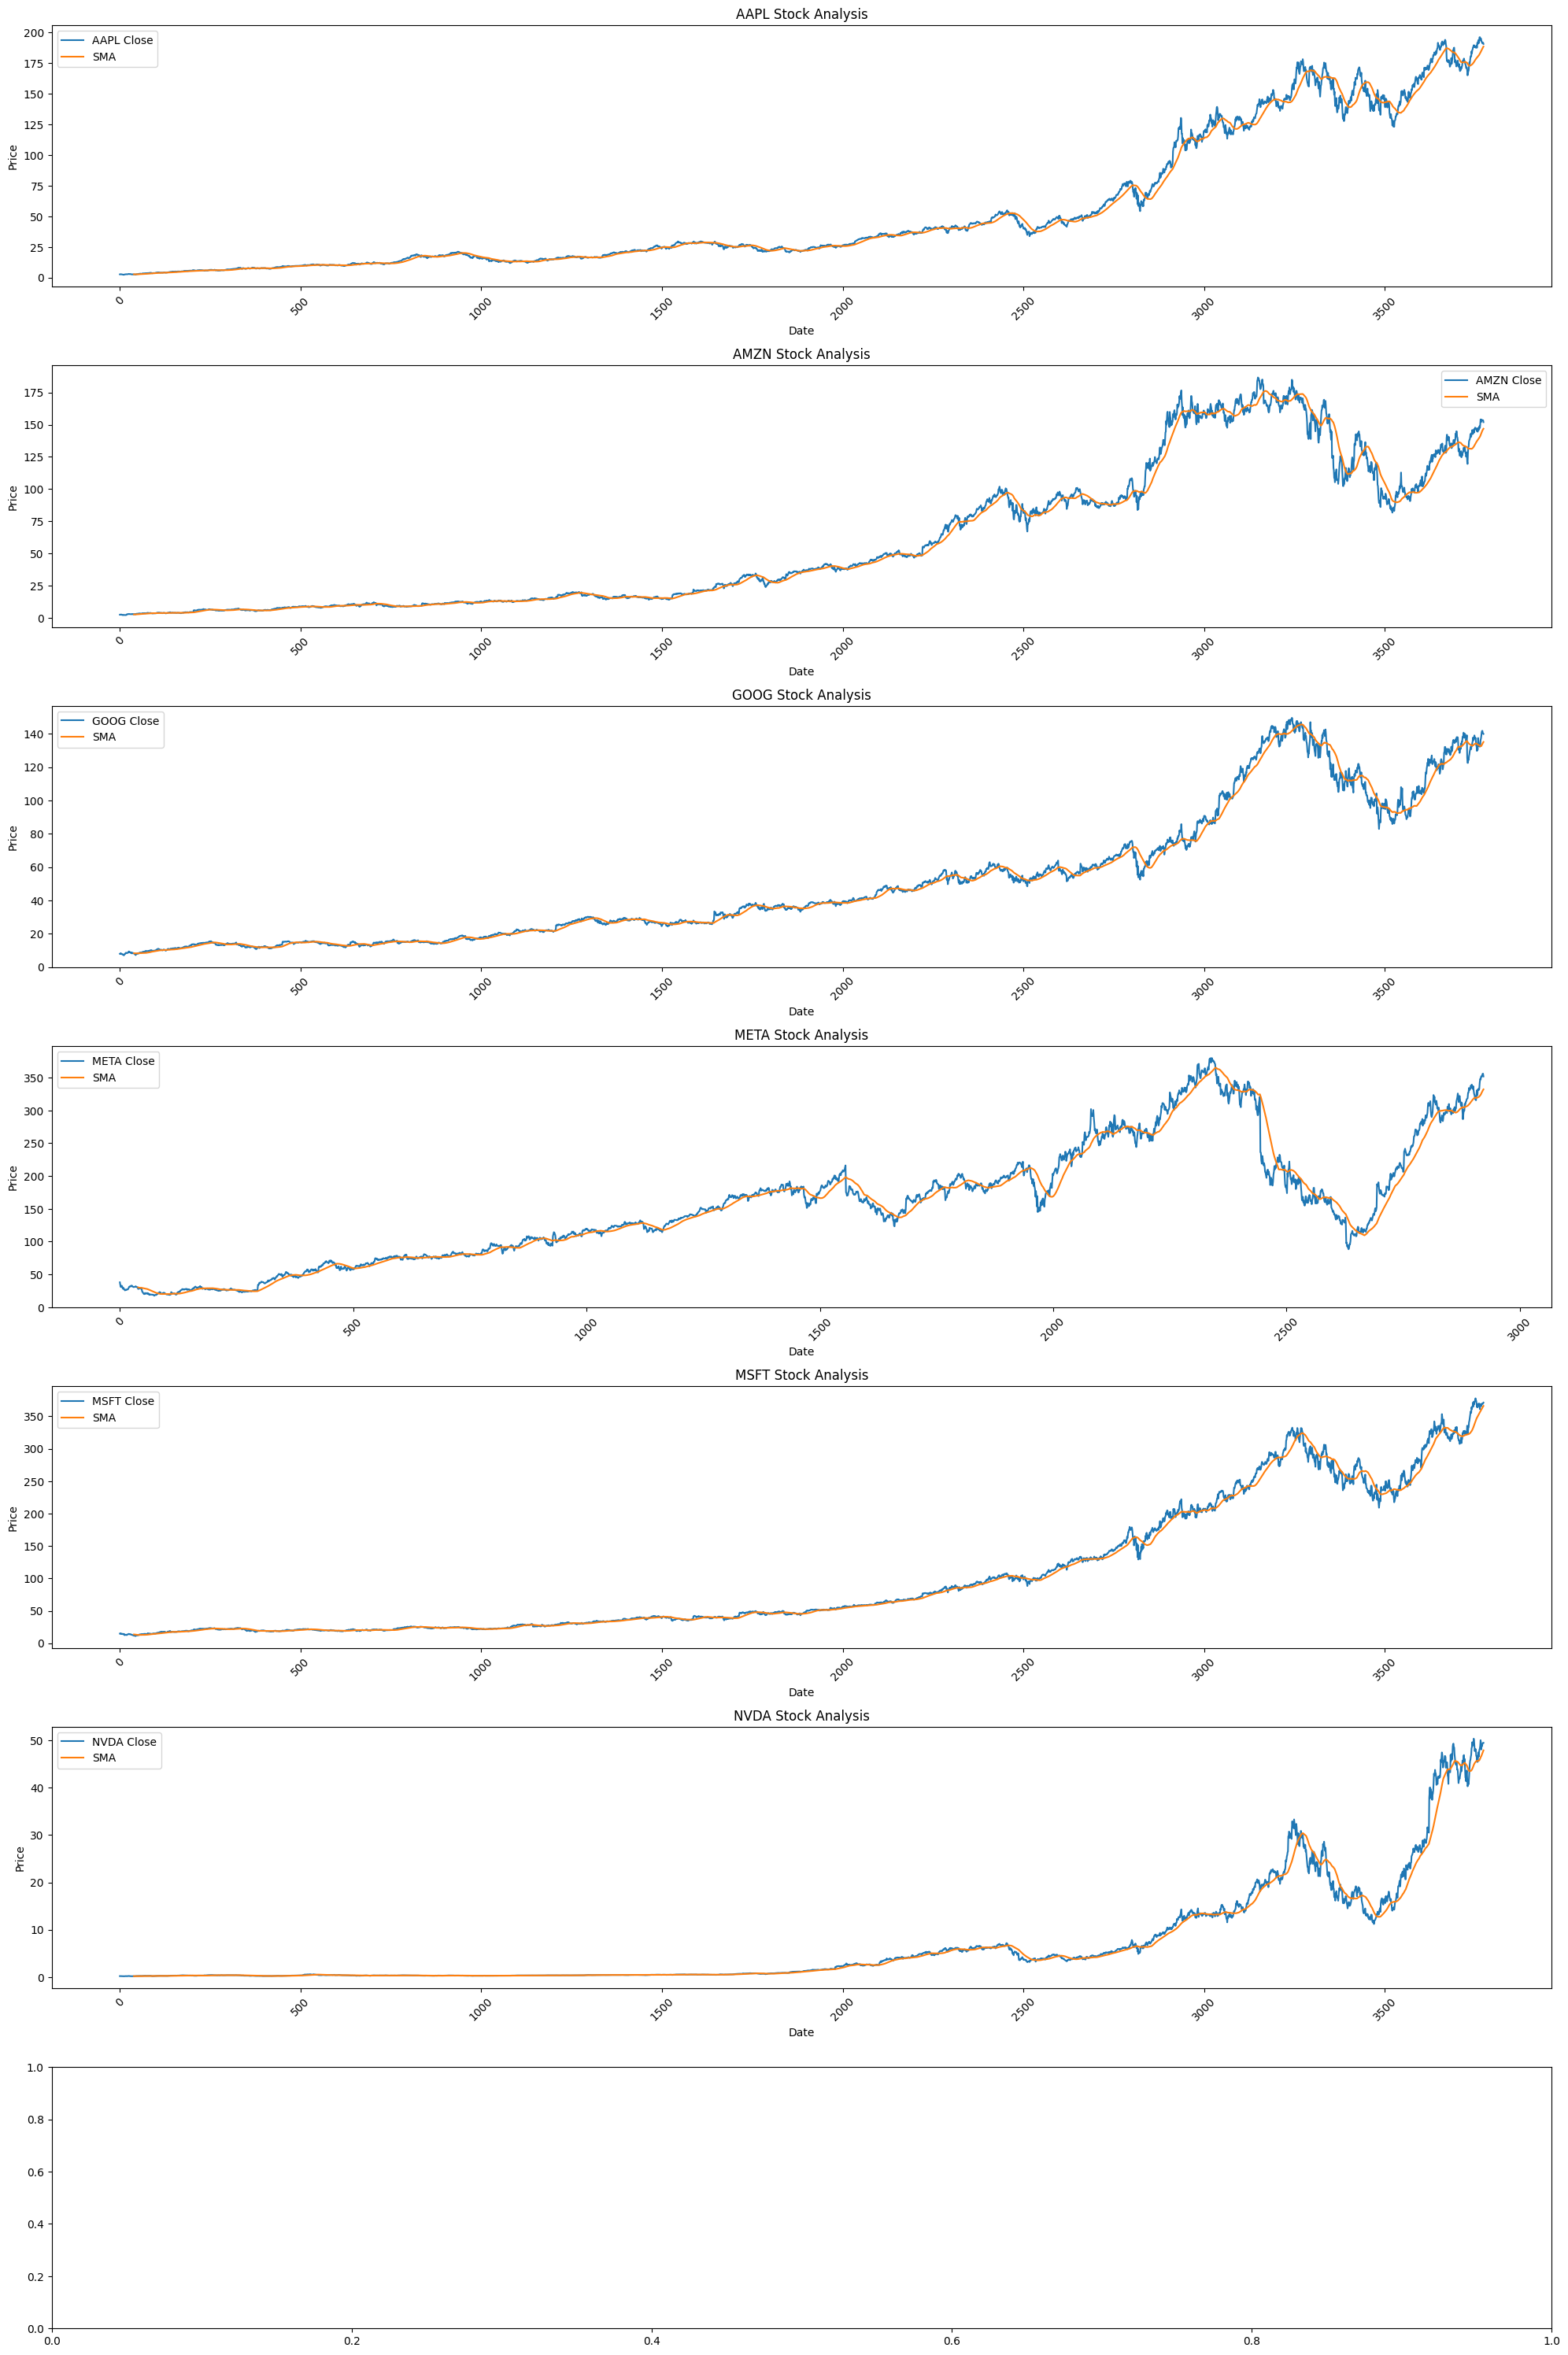

In [23]:
fig, ax = plt.subplots(ncols=1, nrows=7, figsize=(20, 30), squeeze=True)

for idx in range(len(tickers)):
    # fetch the ticker related data
    ticker = tickers[idx]
    ticker_data = dataframes[idx]
    sma = moving_averages[idx]

    # plot the close price
    sns.lineplot(x=ticker_data.index, y=ticker_data['Close'], ax=ax[idx], label=f'{ticker} Close')

    # plot the moving average
    sns.lineplot(x=sma.index, y=sma, ax=ax[idx], label='SMA')

    # Set plot title and labels
    ax[idx].set_title(f'{ticker} Stock Analysis')
    ax[idx].set_xlabel('Date')
    ax[idx].set_ylabel('Price')

    # Rotate x-ticks for better readability
    ax[idx].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout(pad=1)
plt.show()

## From the above graphs we can see that the moving average acts a support for the prices of the stocks. What I mean by this is that most of the time the real prices of the stocks will stay above/below the moving average and it comes back down/up multiple times right upto the moving average before it crosses to the other side. It some what removes the unpredictability of the price movements